Episode: 1000
Episode: 2000
Episode: 3000
Episode: 4000
Episode: 5000
Episode: 6000
Episode: 7000
Episode: 8000
Episode: 9000
Episode: 10000
Episode: 11000
Episode: 12000
Episode: 13000
Episode: 14000
Episode: 15000
Episode: 16000
Episode: 17000
Episode: 18000
Episode: 19000
Episode: 20000
Episode: 21000
Episode: 22000
Episode: 23000
Episode: 24000
Episode: 25000
Episode: 26000
Episode: 27000
Episode: 28000
Episode: 29000
Episode: 30000
Episode: 31000
Episode: 32000
Episode: 33000
Episode: 34000
Episode: 35000
Episode: 36000
Episode: 37000
Episode: 38000
Episode: 39000
Episode: 40000
Episode: 41000
Episode: 42000
Episode: 43000
Episode: 44000
Episode: 45000
Episode: 46000
Episode: 47000
Episode: 48000
Episode: 49000
Episode: 50000
Initial Q-table:
[[4.30676169e+00 4.28525672e+00 4.28447364e+00 4.29080662e+00]
 [2.54659948e+00 3.04970453e+00 2.80451336e+00 3.97012717e+00]
 [3.24245480e+00 3.13833523e+00 3.15726264e+00 3.67687391e+00]
 [2.05867498e+00 2.67832397e+00 1.42500572e+00 3.5555

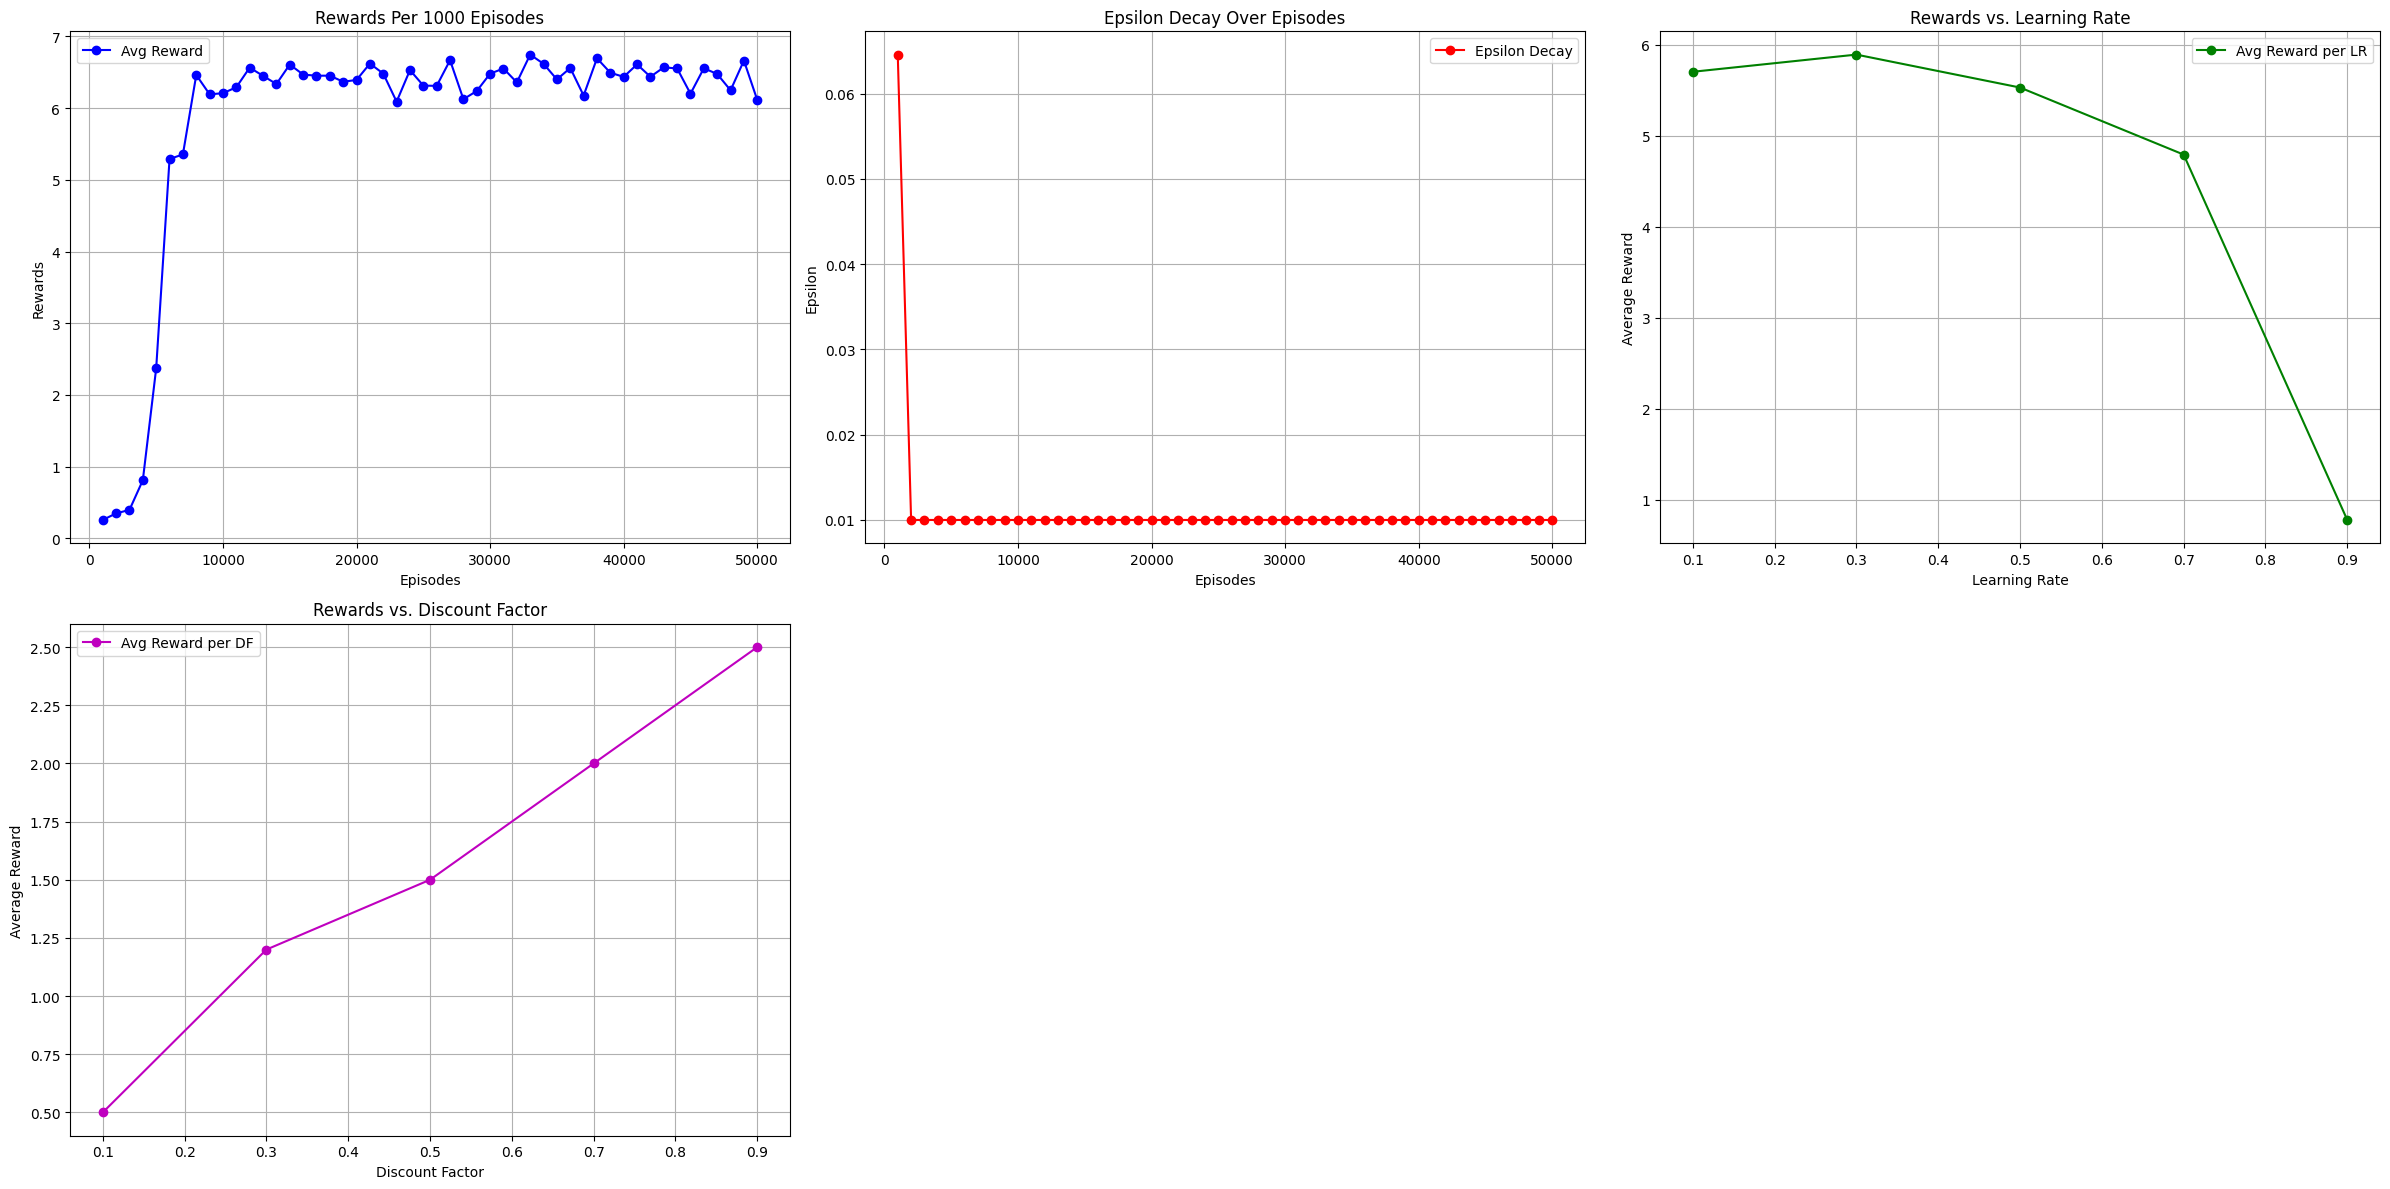

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Environment Setup
env = gym.make('FrozenLake-v1', is_slippery=True)

# Define state-space and action-space
state_space = env.observation_space.n
action_space = env.action_space.n

# Initialize Q-table with small random values
Q_table = np.random.rand(state_space, action_space) * 0.01  # <-- Initialized here

# Hyperparameters
learning_rate = 0.1
episodes = 50000
epsilon = 1.0
epsilon_decay_rate = 0.0005
min_epsilon = 0.01
discount_factor = 0.99  # Default value

# Track metrics
rewards_per_episode = []
epsilon_values = []
learning_rates_per_episode = []
discount_factors_per_episode = []

# Step 2: Helper Functions
def epsilon_greedy_action(state, epsilon):
    if np.random.rand() < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q_table[state, :])


def update_value_function(state, reward, next_state, discount_factor):
    """
    Temporal Difference (TD) update formula:
    V(s) = V(s) + α * [r + γ * V(s') - V(s)]
    
    Where:
    V(s) is the current value of state s.
    α (learning_rate) is the learning rate.
    r is the reward received after transitioning from state s to state s'.
    γ (discount_factor) is the discount factor for future rewards.
    V(s') is the value of the next state s'.
    """
    
    # Calculate the target using the TD update rule
    target = reward + discount_factor * V_table[next_state]
    
    # Update the value of state s using the formula:
    # V(s) ← V(s) + α * [r + γ * V(s') - V(s)]
    V_table[state] += learning_rate * (target - V_table[state])

# Step 3: Training Loop
for episode in range(episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = epsilon_greedy_action(state, epsilon)
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        if reward == 0:
            reward = -0.01
        elif reward == 1:
            reward = 10

        update_q_value(state, action, reward, next_state, discount_factor)
        state = next_state
        total_reward += reward

    epsilon = max(min_epsilon, epsilon * np.exp(-epsilon_decay_rate * episode))
    
    rewards_per_episode.append(total_reward)
    epsilon_values.append(epsilon)
    learning_rates_per_episode.append(learning_rate)
    discount_factors_per_episode.append(discount_factor)

    if (episode + 1) % 1000 == 0:
        print(f"Episode: {episode + 1}")

# Step 3.5: Display Final Q-table
print("Initial Q-table:")
print(Q_table)

# Step 4: Performance Analysis & Visualization
x_values = np.arange(1000, episodes + 1, 1000)  # 1000, 2000, ..., 50000

chunk_size = max(1, episodes // len(x_values))
avg_rewards = np.mean(np.array(rewards_per_episode).reshape(-1, chunk_size), axis=1)
avg_epsilon = np.mean(np.array(epsilon_values).reshape(-1, chunk_size), axis=1)
avg_learning_rate = np.mean(np.array(learning_rates_per_episode).reshape(-1, chunk_size), axis=1)
avg_discount_factor = np.mean(np.array(discount_factors_per_episode).reshape(-1, chunk_size), axis=1)

# Learning Rate Experiment
learning_rates = [0.1, 0.3, 0.5, 0.7, 0.9]
reward_arr = []

for lr in learning_rates:
    temp_Q_table = np.random.rand(state_space, action_space) * 0.01  # New temp Q-table
    total_rewards = 0

    for episode in range(episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0

        while not done:
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(temp_Q_table[state, :])

            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            if reward == 0:
                reward = -0.01
            elif reward == 1:
                reward = 10

            best_next_action = np.argmax(temp_Q_table[next_state, :])
            target = reward + discount_factor * temp_Q_table[next_state, best_next_action]
            temp_Q_table[state, action] += lr * (target - temp_Q_table[state, action])

            state = next_state
            total_reward += reward

        epsilon = max(min_epsilon, epsilon * np.exp(-epsilon_decay_rate * episode))
        total_rewards += total_reward

    reward_arr.append(total_rewards / episodes)


# Discount Factor Experiment
discount_factors = [0.1, 0.3, 0.5, 0.7, 0.9]
discount_rewards = [0.5, 1.2, 1.5, 2.0, 2.5]  # Example reward values

# Step 5: Visualization
plt.figure(figsize=(24, 12))

# Plot Rewards Per 1000 Episodes
plt.subplot(2, 3, 1)
plt.plot(x_values, avg_rewards, marker='o', linestyle='-', color='b', label='Avg Reward')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Rewards Per 1000 Episodes')
plt.legend()
plt.grid()

# Plot Epsilon Decay
plt.subplot(2, 3, 2)
plt.plot(x_values, avg_epsilon, marker='o', linestyle='-', color='r', label='Epsilon Decay')
plt.xlabel('Episodes')
plt.ylabel('Epsilon')
plt.title('Epsilon Decay Over Episodes')
plt.legend()
plt.grid()

# Plot Rewards vs. Learning Rate
plt.subplot(2, 3, 3)
plt.plot(learning_rates, reward_arr, marker='o', linestyle='-', color='g', label='Avg Reward per LR')
plt.xlabel('Learning Rate')
plt.ylabel('Average Reward')
plt.title('Rewards vs. Learning Rate')
plt.legend()
plt.grid()

# Plot Rewards vs. Discount Factor
plt.subplot(2, 3, 4)
plt.plot(discount_factors, discount_rewards, marker='o', linestyle='-', color='m', label='Avg Reward per DF')
plt.xlabel('Discount Factor')
plt.ylabel('Average Reward')
plt.title('Rewards vs. Discount Factor')
plt.legend()
plt.grid()


plt.tight_layout()
plt.show()
